In [1]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 기본값으로 설정 (처음 5개와 마지막 5개 행만 출력)
pd.reset_option('display.max_rows')

# 출력 포맷 설정 (소수점 4자리까지)
pd.options.display.float_format = '{:.4f}'.format

import platform
import seaborn as sns

import matplotlib.pyplot as plt

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

apple gothic


### 최종 피처 시각화

In [2]:
train = pd.read_csv('../data/dataset/train.csv', dtype={'거래소코드' : 'object'})
test = pd.read_csv('../data/dataset/test.csv', dtype={'거래소코드' : 'object'})

train.shape, test.shape

((1187, 226), (198, 226))

In [3]:
train.head(2)

,거래소코드,회사명,회계년도,상장일,상장폐지일,결산년도,상장년도,market,자산,유형자산,유동자산,재고자산,자본,매출액,매출원가,판매비와 관리비(물류원가 등 포함),기타(영업)비용,당기제조원가,급여,퇴직급여,상품매출원가,제품매출원가,감가상각비,대손상각비,개발비상각,기타무형자산상각비,외환차익1,외화환산이익1,외환차손1,외화환산손실1,외환차익2,외화환산이익2,외환차손2,외환환산손실2,무형자산,건설중인자산,토지,자본잉여금,이익잉여금(결손금),미처분이익잉여금(결손금),기타임의적립금,(연차배당),(중간배당),배당금지급(-),단기차입금,매입채무 및 기타유동채무,매출채권 및 기타유동채권,비유동자산,사채,유동금융자산,유동부채,유동성장기부채,장기매입채무 및 기타비유동채무,장기매출채권 및 기타비유동채권,장기차입금,현금및현금성자산,영업활동으로 인한 현금흐름,유형자산의 증가,무형자산의 증가,연구개발비,종업원수,비유동부채,부채,유형자산의증가,유형자산의감소,(투자활동으로 인한 현금유출액),투자활동으로 인한 현금유입액,자본금,관계기업 등 지분관련 투자자산,영업손익,이자보상배율,년도차,자산_전기,자산증가율,유형자산_전기,유형자산증가율,유동자산_전기,유동자산증가율,재고자산_전기,재고자산증가율,자본_전기,자본증가율,매출액_전기,매출액증가율,자산평균,유형자산평균,무형자산_전기,무형자산평균,건설중인자산_전기,건설중인자산평균,토지_전기,토지평균,자본평균,총자산회전율,감가상각율,배당률,판관비체크,순외환손익대비매출액,매출원가대비매출액,당기총제조비용,재고조정중의고정비,고정비,총비용,변동비,변동비대비매출액,고정비대비매출액,인건비대비매출액,인건비대비영업총비용,1인당매출액,1인당인건비,재고자산평균,비유동자산_전기,비유동자산평균,매출채권 및 기타유동채권평균,장기매출채권 및 기타비유동채권평균,매입채무 및 기타유동채무평균,장기매입채무 및 기타비유동채무평균,주주이익(버핏),순운전자본(민식),유무형자산,영업현금흐름대비투하자본,ROTCE현금흐름대체,유형자산대비현금흐름,유무형자산대비현금흐름,매출대비고정자산,단기차입금_전기,단기차입금평균,장기차입금_전기,장기차입금평균,유동비율,현금비율,당좌비율,자기자본비율,비유동비율,부채비율,유동부채비율,비유동부채비율,비유동장기적합률,차입금의존도,매출채권대비매입채무,순운전자본,순운전자본대비총자본,차입금대비매출액,매출채권대비매입채무_before,영업활동현금흐름 대 총자산,영업활동현금흐름 대 매출액,투자안정성비율,영업활동현금흐름 대 투자활동현금지출,경영자산회전율분모,매출채권,매입채무,차입금,경영자산회전율분모_전기,매출채권_전기,매입채무_전기,차입금_전기,부채_전기,자본금_전기,영업활동현금흐름 대 총부채,자기자본회전율,자본금회전율,경영자산회전율,비유동자산회전율,유형자산회전율,재고자산회전율,매출채권회전율,매입채무회전율,차입금 대 매출액,label,시가총액,상장주식수,배당수익률,DATE,DGS10,DGS1,DGS6MO,T10Y2Y,WTI_oil,Dubai_oil,realGDP_usa,real_PCE,Core_PCE,CPI_sticky,Core_CPI,manuf_PMI(R),non_manuf_PMI(R),manuf_GB,non_manuf_GB,Equip_inv,TB_rtn(1y),TB_rtn(10y),IR_sm,DXY,CB_spread(AA-),CB_spread(BBB-),경제고통지수,경상수지,수입금액지수,수입물량지수,수출금액지수,수출물량지수,미국수입금액,중국수입금액,미국수출금액,중국수출금액,실업률,실업률_증감,소비자물가상승률,근원물가상승률,근원물가상승률_식품에너지제외,GDP_growth,CLI(경기선행),CCI(경기동행),NSI(=뉴스심리지수),기업실사BSI_실적,기업실사BSI_전망,year,month,매출액정상영업이익률,매출액순이익률,매출액총이익률,총자본순이익률,총자본사업이익률,총자본정상영업이익률,자기자본정상영업이익률,자기자본순이익률
0,000040,케이알모터스(주),2012/12,1976/05/25,NaN,2012,1976,1,119327267.0000,55810192.0000,61684604.0000,24763334.0000,60797171.0000,97926654.0000,92177389.0000,11948008.0000,0.0000,0.0000,2579833.0000,350950.0000,0.0000,0.0000,35985.0000,1248799.0000,0.0000,650714.0000,155998.0000,0.0000,470896.0000,1310924.0000,0.0000,0.0000,0.0000,0.0000,1118203.0000,0.0000,42542501.0000,3884892.0000,7235571.0000,12088682.0000,0.0000,0.0000,0.0000,-0.0000,10401663.0000,28964045.0000,26201155.0000,57642663.0000,0.0000,100000.0000,43762954.0000,0.0000,407646.0000,342768.0000,0.0000,10236751.0000,-4565749.0000,937241.0000,42700.0000,0.0000,249.0000,14767142.0000,58530096.0000,937241.0000,21084.0000,992041.0000,464863.0000,59670690.0000,0.0000,-6198743.0000,-6.4700,1.0000,133337774.0000,-10.5075,57761033.0000,-3.3774,73022140.0000,-15.5262,24384487.0000,1.5536,68764654.0000,-11.5866,127720215.0000,-23.3272,126332520.5000,56785612.5000,1804381.0000,1461292.0000,0.0000,0.0000,42542501.0000,42542501.0000,64780912.5000,0.7752,0.0972,-0.0000,True,-13.6075,94.1290,14842806.0000,7635041.5537,11035931.0537,104125397.0000,93089465.9463,95.0604,11.2696,2.9928,24.5295,393280.0000,10361.0000,24573910.5000,60315635.0000,58979149.0000,26201155.0000,342768.0000,28964045.0000,407646.0000,-4858991.0000,51117833.5000,58246904.5000,0.0000,0.0000,0.0000,0.0000,0.0000,10304725.0000,10353194.0000,0.0000,0.0000,140.9516,23.3914,23.6199,50.9499,94.8114,96.2711,71.9819,24.2892,76.2829,8.7169,90.3725,17921650.0000,15.0189,10.5724,90.3725,0.0000,0.0000,0.0000,0.0000,119327267.0000,26543923.0000,29371691.0000,10401663.0000,133337774.0000,33214201.0000,35842471.0000,10304725.0000,64573121.0000,59670690.0000,0.0000,1.5117,1.6411,0.7752,1.6604,1.7245,3.9850,3.2774,3.0032,10.5724,0.0000,58954641.2260,119341379.0000,-0.0000,2012-12-01,1.7274,0.1675,0.1282,1.4629,94.2008,3.3083,2.2891,1.3673,1.8500,-139.7270,0.7093,50.7000,56.1000,1,1,-9.4000,3.1237,3.4437,5.2200,2.5615,0.6325,6.2021,4.5000,1.9324,-5.6000,-1.7000,-2.4000,-1.1000,-16.6000,-6.3000,-1.0000,2.7000,3.1000,-0.1000,1.4000,1.1000,1.3000,0.0198,-0.1000,-0.5000,1.8700,-14,-17,2012,12,-6

In [4]:
# 28개 중 vif, corr, pvalue 기준 11개

features = [
  # 재무제표 항목
  '미처분이익잉여금(결손금)', '배당금지급(-)',

   # 수익성
  '영업손익', '자기자본순이익률', '총자본정상영업이익률',

    # 안정성
  '당좌비율',  '순운전자본대비총자본', '비유동장기적합률',

  # 활동성
  '자본금회전율', '총자산회전율'
]

len(features)

10

In [5]:
train_final = train[features + ['label']]
train_final.shape

(1187, 11)

In [6]:
train_final['label'] = train_final['label'].apply(lambda x: '회생(1)' if x==1 else '부실(0)')

In [7]:
# for feature in train_final.columns.difference(['label']):
#     # label별 feature의 분포
#     sns.boxplot(x='label', y = feature, data=train_final)
#     plt.show()

In [8]:
train_final.columns

Index(['미처분이익잉여금(결손금)', '배당금지급(-)', '영업손익', '자기자본순이익률', '총자본정상영업이익률', '당좌비율',
       '순운전자본대비총자본', '비유동장기적합률', '자본금회전율', '총자산회전율', 'label'],
      dtype='object')

In [9]:
train_final.rename(
    columns = {
        '배당금지급(-)' : '배당금지급액',
        '미처분이익잉여금(결손금)' : '미처분이익잉여금',
        '총자본정상영업이익률' : '총자산영업이익률'
    }, inplace=True
)

In [10]:
train_final.columns

Index(['미처분이익잉여금', '배당금지급액', '영업손익', '자기자본순이익률', '총자산영업이익률', '당좌비율',
       '순운전자본대비총자본', '비유동장기적합률', '자본금회전율', '총자산회전율', 'label'],
      dtype='object')

In [11]:
# 28개 중 vif, corr, pvalue 기준 11개

features = [
  # 재무제표 항목
  '미처분이익잉여금(결손금)', '배당금지급(-)',

   # 수익성
  '영업손익', '자기자본순이익률', '총자본정상영업이익률',

    # 안정성
  '당좌비율',  '순운전자본대비총자본', '비유동장기적합률',

  # 활동성
  '자본금회전율', '총자산회전율'
]

len(features)

10

In [12]:
features_log = ['미처분이익잉여금', '배당금지급액', '영업손익']
for col in features_log:
    train_final[f'log({col})'] = train_final[col].apply(np.log10)

In [13]:
desc1 = train_final[train_final['label']=='회생(1)'].describe()
desc1

,미처분이익잉여금,배당금지급액,영업손익,자기자본순이익률,총자산영업이익률,당좌비율,순운전자본대비총자본,비유동장기적합률,자본금회전율,총자산회전율,log(미처분이익잉여금),log(배당금지급액),log(영업손익)
count,409.0000,409.0000,409.0000,409.0000,409.0000,409.0000,409.0000,409.0000,409.0000,409.0000,307.0000,409.0000,137.0000
mean,88237673.0856,5050289.9682,-3854486.4254,-9.9935,-2.2965,94.3702,19.2297,83.3935,20.4722,0.8973,-inf,-inf,6.3157
std,495202456.0638,26036963.2437,42349477.9149,56.5337,4.4958,207.7219,19.4655,54.0718,26.0250,0.5350,NaN,NaN,0.7389
min,-1256160824.0000,-0.0000,-291653000.0000,-1073.2200,-32.5100,0.0198,0.0000,10.6992,0.2598,0.0607,-inf,-inf,4.3692
25%,0.0000,0.0000,-3859019.0000,-12.3200,-3.3000,13.3244,0.0000,55.4405,6.1874,0.5389,7.0383,NaN,5.9004
50%,15942132.0000,175196.0000,-1344581.0000,-3.7600,-0.9000,33.3400,14.8877,76.9158,11.6813,0.7982,7.4993,5.2435,6.2270
75%,62694683.0000,1145404.0000,795115.0000,0.6100,0.3600,90.9186,32.0854,101.8134,23.4804,1.1058,7.9426,6.0590,6.6633
max,8310046000.0000,299561133.0000,362417228.0000,168.4000,3.8400,2732.8686,82.1267,877.4662,215.6008,4.3404,9.9196,8.4765,8.5592


In [14]:
desc_0 = train_final[train_final['label']!='회생(1)'].describe()
desc_0

,미처분이익잉여금,배당금지급액,영업손익,자기자본순이익률,총자산영업이익률,당좌비율,순운전자본대비총자본,비유동장기적합률,자본금회전율,총자산회전율,log(미처분이익잉여금),log(배당금지급액),log(영업손익)
count,778.0000,778.0000,778.0000,778.0000,778.0000,778.0000,778.0000,778.0000,778.0000,778.0000,470.0000,778.0000,179.0000
mean,35099924.3303,2277229.3046,-19429224.7828,-25.5409,-4.8357,214.1618,16.6099,105.7504,24.7429,0.7212,-inf,-inf,6.1925
std,419994988.3695,12065325.0713,151869721.5351,109.7467,7.0923,1570.8225,20.9401,270.1634,156.9654,0.4329,NaN,NaN,0.7955
min,-1345931623.0000,-0.0000,-3249454965.0000,-2368.5300,-48.6900,0.0050,0.0000,3.4094,0.0288,0.0097,-inf,-inf,3.7696
25%,-10526742.5000,0.0000,-7337043.5000,-24.8300,-7.3275,13.4897,0.0000,60.4545,3.5633,0.4241,6.9119,NaN,5.6862
50%,4924978.0000,-0.0000,-2604554.5000,-8.1250,-2.6150,32.7566,7.2473,88.1562,8.3467,0.6575,7.3499,NaN,6.1393
75%,27840984.2500,790947.2500,-140727.0000,-1.4725,-0.1450,83.9658,28.0074,110.9595,18.0462,0.9503,7.6771,5.8981,6.7376
max,7503312000.0000,183888982.0000,427910874.0000,348.1900,4.1700,41054.2809,91.7315,7182.3085,3983.8533,3.7271,9.8753,8.2646,8.6314


In [15]:
desc1.loc['mean'] > desc_0.loc['mean']

미처분이익잉여금          True
배당금지급액            True
영업손익              True
자기자본순이익률          True
총자산영업이익률          True
당좌비율             False
순운전자본대비총자본        True
비유동장기적합률         False
자본금회전율           False
총자산회전율            True
log(미처분이익잉여금)    False
log(배당금지급액)      False
log(영업손익)         True
Name: mean, dtype: bool

In [16]:
desc1.loc['std'] > desc_0.loc['std']

미처분이익잉여금          True
배당금지급액            True
영업손익             False
자기자본순이익률         False
총자산영업이익률         False
당좌비율             False
순운전자본대비총자본       False
비유동장기적합률         False
자본금회전율           False
총자산회전율            True
log(미처분이익잉여금)    False
log(배당금지급액)      False
log(영업손익)        False
Name: std, dtype: bool

In [21]:
train_final[['미처분이익잉여금', '배당금지급액']].describe()

,미처분이익잉여금,배당금지급액
count,1187.0000,1187.0000
mean,53409392.9410,3232732.0944
std,447843301.6057,18174804.8549
min,-1345931623.0000,-0.0000
25%,-6372591.0000,-0.0000
50%,8398760.0000,0.0000
75%,36737978.5000,951365.0000
max,8310046000.0000,299561133.0000


재무제표 항목


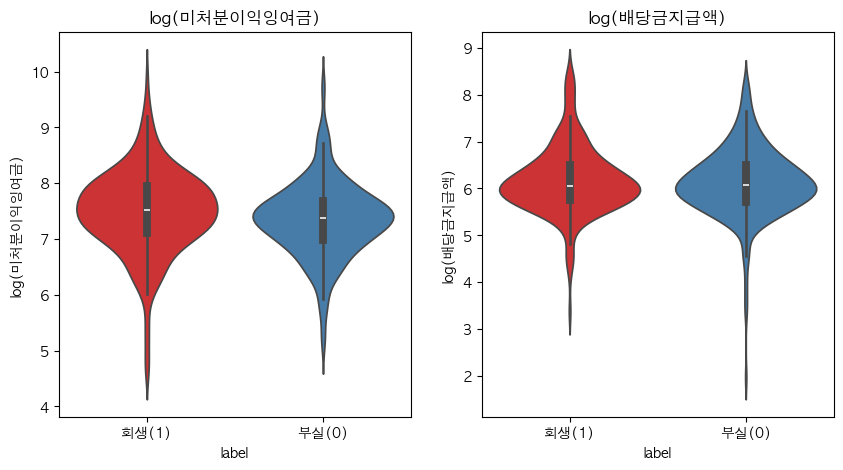

In [17]:
label_order = ["회생(1)", '부실(0)']


# 재무제표 항목
print('재무제표 항목')
plt.figure(figsize=(10, 5))
for i, feature in enumerate(['log(미처분이익잉여금)', 'log(배당금지급액)']):
# for i, feature in enumerate(['미처분이익잉여금', '배당금지급액']):
    plt.subplot(1, 2, i+1)
    
    sns.violinplot(x='label', y = feature, data=train_final, palette="Set1", order=label_order)
    plt.title(feature)

    sns.pointplot(x="label", y=feature, data=train_final.groupby('label')[feature].mean().reset_index(), 
                  color='black', linewidth=5, markers="d", scale=0.5)
plt.show()

수익성


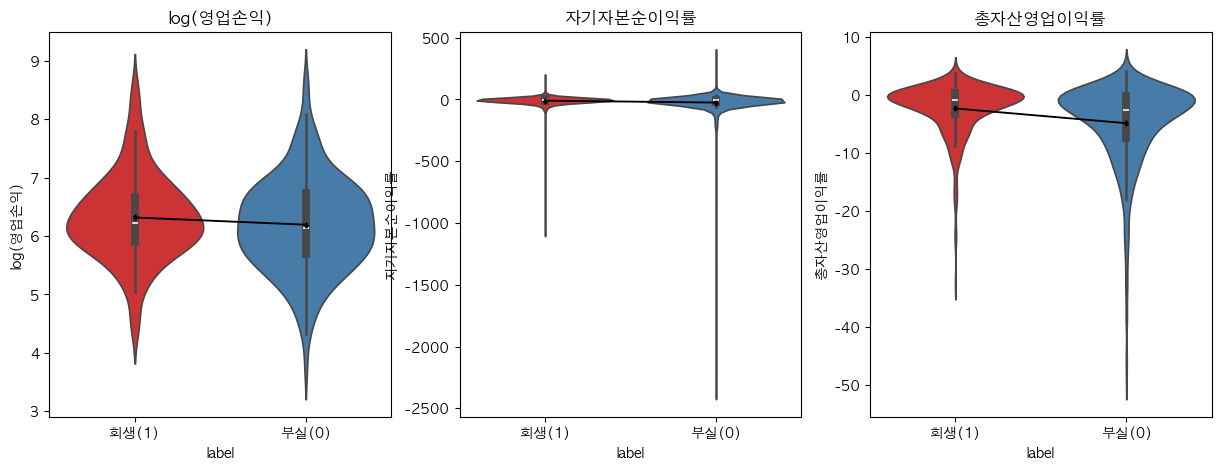

재무제표 항목


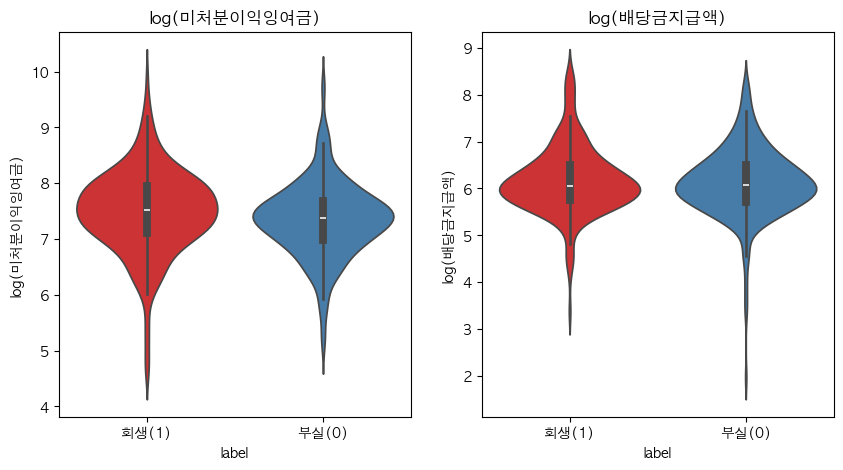

안정성


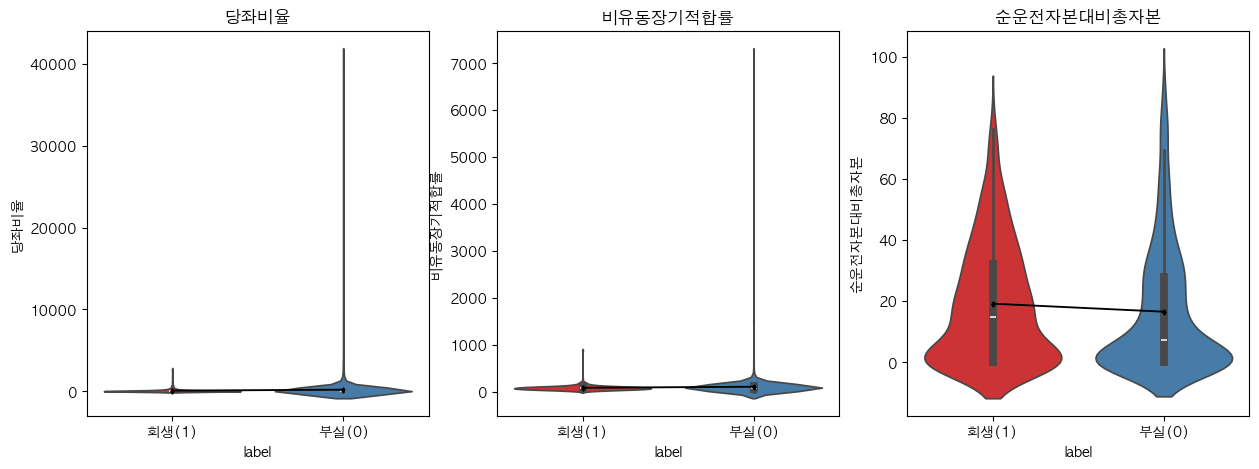

활동성


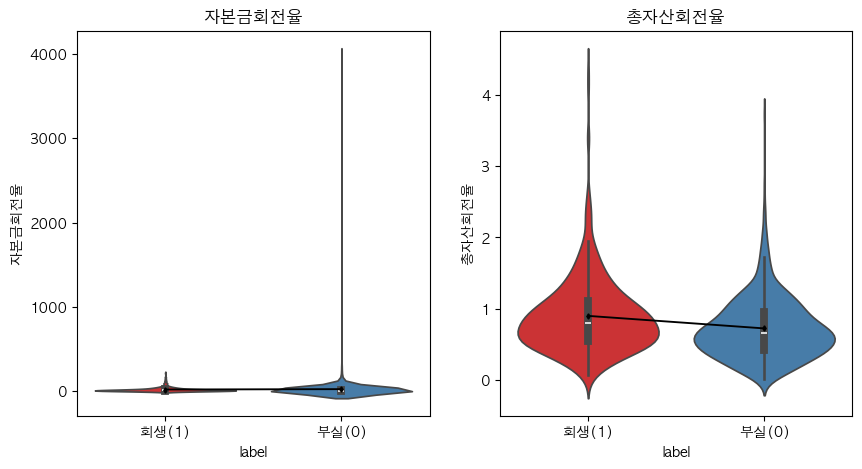

In [18]:
# 레이블 순서 지정
label_order = ["회생(1)", '부실(0)']



# 수익성
print('수익성')
plt.figure(figsize=(15, 5))
# for i, feature in enumerate(['영업손익', '자기자본순이익률', '총자산영업이익률']):
for i, feature in enumerate(['log(영업손익)', '자기자본순이익률', '총자산영업이익률']):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x='label', y = feature, data=train_final, palette="Set1", order=label_order)
    plt.title(feature)
    sns.pointplot(x="label", y=feature, data=train_final.groupby('label')[feature].mean().reset_index(), 
                  color='black', linewidth=5, markers="d", scale=0.5)
plt.show()

# 재무제표 항목
print('재무제표 항목')
plt.figure(figsize=(10, 5))
for i, feature in enumerate(['log(미처분이익잉여금)', 'log(배당금지급액)']):
# for i, feature in enumerate(['미처분이익잉여금', '배당금지급액']):
    plt.subplot(1, 2, i+1)
    sns.violinplot(x='label', y = feature, data=train_final, palette="Set1", order=label_order)
    plt.title(feature)
    sns.pointplot(x="label", y=feature, data=train_final.groupby('label')[feature].mean().reset_index(), 
                  color='black', linewidth=5, markers="d", scale=0.5)
plt.show()


# 안정성
print('안정성')
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['당좌비율', '비유동장기적합률', '순운전자본대비총자본']):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x='label', y = feature, data=train_final, palette="Set1", order=label_order)
    plt.title(feature)
    sns.pointplot(x="label", y=feature, data=train_final.groupby('label')[feature].mean().reset_index(), 
                  color='black', linewidth=5, markers="d", scale=0.5)
plt.show()

# 활동성
print('활동성')
plt.figure(figsize=(10, 5))
for i, feature in enumerate(['자본금회전율', '총자산회전율']):
    plt.subplot(1, 2, i+1)
    # label별 feature의 분포
    # -> 분산 확인 : boxplot + 커널밀도함수
    sns.violinplot(x='label', y = feature, data=train_final, palette="Set1", order=label_order)
    plt.title(feature)
    sns.pointplot(x="label", y=feature, data=train_final.groupby('label')[feature].mean().reset_index(), 
                  color='black', linewidth=5, markers="d", scale=0.5)

plt.show()

In [19]:
features_top = ['당좌비율', '비유동장기적합률', ]
features_bottom = ['영업손익', '자기자본순이익률', '총자본정상영업이익률', '순운전자본대비총자본']